# Loading dataset

In [5]:
%plot inline

In [6]:
!cat ../data/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [7]:
!head ../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [8]:
data = dlmread("../data/winequality-red.csv", ";" ,1, 0); % skip feature names
size(data)

ans =

   1599     12



# Preparing data

In [9]:
% randomize order of data for excluding biases in the dataset
n = rand(length(data),1);
[_ index] = sort(n);
data_rand = data(index, :);

In [10]:
data_norm = [];
mu = [];
sigma = [];

% normalizing data for optimum use of algorithms
for j = 1:size(data_rand,2),
    mu = [mu; mean(data_rand(:,j))];
    sigma = [sigma; std(data_rand(:,j))];
    data_norm = [data_norm, (data_rand(:,j)- mu(j)*ones(size(data,1),1))/sigma(j)];
end

cor =

 Columns 1 through 6:

   1.0000000  -0.2561309   0.6717034   0.1147767   0.0937052  -0.1537942
  -0.2561309   1.0000000  -0.5524957   0.0019179   0.0612978  -0.0105038
   0.6717034  -0.5524957   1.0000000   0.1435772   0.2038229  -0.0609781
   0.1147767   0.0019179   0.1435772   1.0000000   0.0556095   0.1870490
   0.0937052   0.0612978   0.2038229   0.0556095   1.0000000   0.0055621
  -0.1537942  -0.0105038  -0.0609781   0.1870490   0.0055621   1.0000000
  -0.1131814   0.0764700   0.0355330   0.2030279   0.0474005   0.6676665
   0.6680473   0.0220262   0.3649472   0.3552834   0.2006323  -0.0219458
  -0.6829782   0.2349373  -0.5419041  -0.0856524  -0.2650261   0.0703775
   0.1830057  -0.2609867   0.3127700   0.0055271   0.3712605   0.0516576
  -0.0616683  -0.2022880   0.1099032   0.0420754  -0.2211405  -0.0694084
   0.1240516  -0.3905578   0.2263725   0.0137316  -0.1289066  -0.0506561

 Columns 7 through 12:

  -0.1131814   0.6680473  -0.6829782   0.1830057  -0.0616683   0.1240

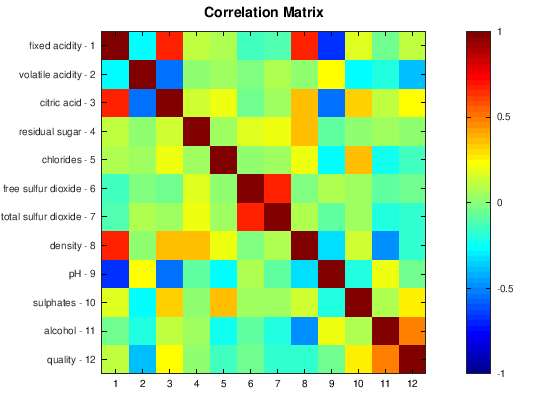

In [11]:
% correlation matrix
cor = corr(data_norm)

imagesc(cor);

set(gca, 'XTick', 1:size(cor,2)); % center x-axis ticks on bins
set(gca, 'YTick', 1:size(cor,2)); % center y-axis ticks on bins
set(gca, 'YTickLabel', ["fixed acidity - 1";"volatile acidity - 2";"citric acid - 3";"residual sugar - 4";
                        "chlorides - 5";"free sulfur dioxide - 6";"total sulfur dioxide - 7";"density - 8";
                        "pH - 9";"sulphates - 10";"alcohol - 11";"quality - 12"]); % set y-axis labels
                        
title('Correlation Matrix', 'FontSize', 14); % set title

caxis([-1, 1]);  % colorbar ranging from -1 to 1
colormap('jet'); % set the colorscheme
colorbar;        % enable colorbar

# Separating into training and testing set

In [12]:
X = data_norm(:,1:11); % inputs
y = data_norm(:, 12);  % labels

In [13]:
X_train = X(1:1119, :); % 70% for training
y_train = y(1:1119);

X_test = X(1120:1599, :);  % 30% for testing
y_test = y(1120:1599);

# ANN Architecture

![Diagram](../Diagram.png)

In [14]:
% M number of labeled inputs
% N number of features (lenght of input vector)
[M, N] = size(X_train)

M =  1119
N =  11


In [15]:
O = 8 % number of neurons in the hidden layer

O =  8


In [16]:
% initial weights matrix as small random values
W = randn([O N]).*0.01; % W: OxN
W_o = randn([1 O]).*0.01;

In [17]:
% adding column for bias
X_train_bias = [ones(size(X_train,1),1), X_train]'; % X_train_bias: MxN+1
X_test_bias = [ones(size(X_test,1),1), X_test]';
W_bias = [ones(size(W,1),1), W]; % W_bias: N+1xO
W_o_bias = [ones(size(W_o,1),1), W_o];

## ANN evaluation function:

Feedfoward output:


$ \mathbf{u} = \mathbf{W^1x} $  
$ \mathbf{a} = f(\mathbf{u}) = \tanh(\mathbf{u})$  
$ y = \sum \mathbf{W^2a}$

$$
    y = \sum \mathbf{W^2}\tanh{(\mathbf{W^1x})}
$$

# Learning

## Backpropagation


Gradient descent for minimizing error function J:

$$
\mathbf{W^{N+1}} = \mathbf{W^N} - \alpha \nabla{J} =  \mathbf{W^N} - \alpha \frac{\partial{J}}{\partial{\mathbf{W}}}
$$

Definig error function as squared error:

$$
J = e^2 = (s-y)^2
$$

Chain rule for finding gradient of J:

$$
\frac{\partial{J}}{\partial{\mathbf{W}}} = \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{a}}} \frac{\partial{\mathbf{a}}}{\partial{\mathbf{u}}} \frac{\partial{\mathbf{u}}}{\partial{\mathbf{W}}} = 2 (s - y) (-1) (1) \mathbf{\dot{F}(u)} \mathbf{x} = \boldsymbol{\delta} \mathbf {x}
$$

Where the array $\mathbf{\dot{F}(u)}$ is defined as:

$$
\mathbf{\dot{F}(u)} = 
\begin{bmatrix}
  \dot{f}(u_1) & 0 & \cdots  & 0 \\
  0 & \dot{f}(u_2) & \cdots  & 0 \\
  \vdots   & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots  & \dot{f}(u_O) \\
\end{bmatrix}
$$

and:

$\dot{f}(u) = \frac{d \tanh(u)}{du} = sech^2(u)$

Error metric:

$$
MSE = \frac{1}{M}\sum_M e^2 = \frac{1}{M}\sum_M (s - y)^2
$$

In [52]:
function Delta = get_delta(u, e),
    F_prime = zeros(size(u,2), size(u,2));
    for i = 1:size(u,2),
        for j = 1:size(u,2),
            if i==j,
                F_prime(i,j) = (sech(u(i)))^2; % F: OxO
            end
        end
    end
    
    Delta = -2*F_prime*e; % delta: OxO
    
end

In [76]:
function [W, MSE] = backprop_batch_step(X, s, W, W_o, alpha),

    [M, N] = size(X);
    
    aux = zeros(size(W));
    aux_o = zeros(size(W_o));
    E = [];
    
    for i = 1:M,
        % feedfoward
        u = X(:,i)'*W';      % u: 1xO
        a = tanh(u);         % output of hidden layer a: 1xO
        y = [1 a]*W_o';          % W_o: (O+1)x1, y: 1x1

        e = s(i) - y; % 1x1
        
        E = [E; e]; % E: Mx1
        
        e_o = -2*e;                     % e_o: 1x1
        Delta = get_delta(u, e_o);      % Delta: OxO
        
        % Xv = ones(size(Delta), 1)*X(:,i)'; % Xv: OxN
        %aux = aux + Delta*Xv;              % aux: OxN
        
        aux_o = aux_o -2*[1 a]; % aux_o: (O+1)x1
        
        Xv = ones(size(Delta),1)*[X(:,i)']; % Xv: (O+1)x(N) 
        aux = aux + Delta*Xv;   % W: Ox(N)
        
    end

    aux = aux/M;
    aux_o = aux_o/M;
    
    W_o = W_o - alpha.*aux_o;
                              
    W = W - alpha.*aux; 

    % metric
    MSE = (E'*E)/M;
end

In [77]:
function [W, mse_train_vec, mse_test_vec] = batch_backpropagation (X_te, X_tr, y_te, y_tr, W, W_o, alpha, epsilon, gamma,
                                                                    show_steps, max_iter),
    mse_test_vec = [];
    mse_train_vec = [];
    mse_test = epsilon+1;
    mse_min = inf;
    counter = 0;
    iter = 0;
    
    % stop if passed gamma steps without improvement 
    % or if error is less than epsilon
    % or if it is the iteration number max_iter
    while counter < gamma && mse_test > epsilon && iter < max_iter,
        mse_before = mse_test;
        mse_test = 0;
        [_, mse_test] = backprop_batch_step(X_te, y_te, W, W_o, alpha);
        mse_test_vec = [mse_test_vec; mse_test];
        [W, mse_train] = backprop_batch_step(X_tr, y_tr, W, W_o, alpha);
        mse_train_vec = [mse_train_vec; mse_train];
        
        if mse_test > mse_min,
            counter = counter + 1;
        else,
            mse_min = mse_test;
            counter = 0;
        end
        
        iter = iter + 1;
        
        if show_steps,
            iter
            [mse_train, mse_test]
        end
    end
    
    iter_min = iter - counter
    mse_min
    
end

In [78]:
# hyperparameters
epsilon = 0.01;
alpha = 1;
gamma = 100;
max_iter = 15000;

In [79]:
% backpropagation for number of hidden neurons as defined above in ANN architecture
[W_out, mse_train_vec, mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias, W_o_bias, alpha, epsilon, gamma, 1, max_iter);

iter =  1
ans =

   1.7474   2.4145

iter =  2
ans =

   1.7461   2.4139

iter =  3
ans =

   1.7450   2.4134

iter =  4
ans =

   1.7442   2.4130

iter =  5
ans =

   1.7434   2.4126

iter =  6
ans =

   1.7427   2.4123

iter =  7
ans =

   1.7421   2.4120

iter =  8
ans =

   1.7416   2.4118

iter =  9
ans =

   1.7411   2.4116

iter =  10
ans =

   1.7406   2.4114

iter =  11
ans =

   1.7402   2.4113

iter =  12
ans =

   1.7398   2.4112

iter =  13
ans =

   1.7394   2.4112

iter =  14
ans =

   1.7390   2.4111

iter =  15
ans =

   1.7386   2.4111

iter =  16
ans =

   1.7382   2.4111

iter =  17
ans =

   1.7379   2.4112

iter =  18
ans =

   1.7375   2.4112

iter =  19
ans =

   1.7372   2.4113

iter =  20
ans =

   1.7368   2.4114

iter =  21
ans =

   1.7364   2.4116

iter =  22
ans =

   1.7361   2.4117

iter =  23
ans =

   1.7357   2.4119

iter =  24
ans =

   1.7354   2.4121

iter =  25
ans =

   1.7350   2.4123

iter =  26
ans =

   1.7347   2.4126

iter =  27
ans =

   

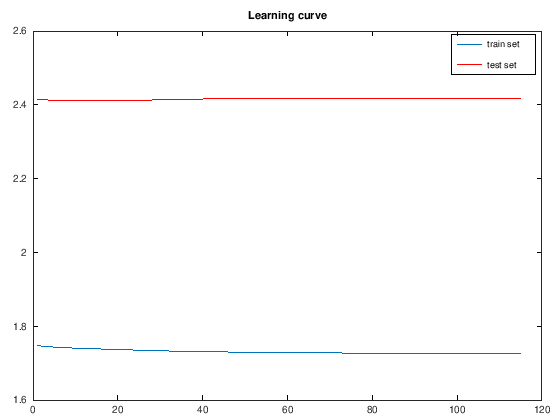

In [80]:
% learning curve
plot(mse_train_vec)
hold on
plot(mse_test_vec, 'r')
title('Learning curve')
legend('train set', 'test set')

In [81]:
% feedfoward ann evaluation
output = sum(X_train_bias' * W_out', 2);

In [82]:
% comparison of output and labels
[output, y_train, (y_train - output)]

ans =

   15.585442   -0.787576  -16.373018
   14.328951   -0.787576  -15.116527
   22.538224   -0.787576  -23.325800
   12.257572    0.450707  -11.806865
  -12.812939    1.688991   14.501930
   20.130206    1.688991  -18.441215
   27.535163   -0.787576  -28.322739
   17.263726    0.450707  -16.813019
    6.334376   -0.787576   -7.121952
   20.309947    0.450707  -19.859240
   -3.799393    1.688991    5.488384
   21.679115   -0.787576  -22.466691
   21.702618    0.450707  -21.251911
   -6.997863    0.450707    7.448570
   13.624938    0.450707  -13.174231
   11.969004   -0.787576  -12.756581
   17.259187   -0.787576  -18.046763
   18.616685    0.450707  -18.165978
   -6.072935    1.688991    7.761926
   21.333767    0.450707  -20.883059
    9.107028   -0.787576   -9.894604
   12.196863   -0.787576  -12.984439
   23.140688   -0.787576  -23.928264
   17.263726    0.450707  -16.813019
    4.631013    0.450707   -4.180306
   -4.096661    0.450707    4.547369
    8.442268    1.688991   -6.7

   17.190990   -0.787576  -17.978566
   22.698998   -0.787576  -23.486574
   -5.133244    0.450707    5.583952
    2.064603   -0.787576   -2.852180
   -1.859469   -0.787576    1.071892
   11.291530   -0.787576  -12.079106
   22.941762   -0.787576  -23.729338
   15.985216    0.450707  -15.534509
   22.746085   -0.787576  -23.533661
    9.472173   -0.787576  -10.259749
   10.606703    0.450707  -10.155996
   31.800738    0.450707  -31.350030
    8.983439    1.688991   -7.294448
  -14.422611    1.688991   16.111602
    6.090544    0.450707   -5.639837
   11.425448   -0.787576  -12.213025
    3.338176    0.450707   -2.887469
   28.696586    0.450707  -28.245878
   18.664772   -0.787576  -19.452348
   -2.375877   -3.264143   -0.888266
   -4.382524   -0.787576    3.594947
   18.103219   -0.787576  -18.890795
   18.124895    0.450707  -17.674188
   26.992081   -0.787576  -27.779657
   12.927134   -0.787576  -13.714710
   23.747546    0.450707  -23.296839
   23.308618   -0.787576  -24.096194
 

    3.501725    1.688991   -1.812734
   23.472912   -2.025860  -25.498772
   11.061669    0.450707  -10.610962
   22.309463    1.688991  -20.620472
    9.611480    0.450707   -9.160773
    2.939703    1.688991   -1.250712
    2.376692    1.688991   -0.687701
   25.654391    0.450707  -25.203683
    6.899088    0.450707   -6.448381
  -14.422611    1.688991   16.111602
   15.833720    0.450707  -15.383013
    4.172436    1.688991   -2.483445
   13.337065   -0.787576  -14.124641
   25.206994   -0.787576  -25.994570
   -0.521109   -0.787576   -0.266467
    5.186289    0.450707   -4.735582
   18.216229   -0.787576  -19.003805
   27.272587    0.450707  -26.821880
    5.101360    0.450707   -4.650653
   22.578505    0.450707  -22.127798
    6.513089   -0.787576   -7.300665
    1.209186    0.450707   -0.758479
    8.329580    0.450707   -7.878873
   20.670896    1.688991  -18.981905
   22.578505    0.450707  -22.127798
    6.140343   -0.787576   -6.927919
   12.532787   -0.787576  -13.320364
 

   28.965902   -2.025860  -30.991762
   28.263757    0.450707  -27.813050
   25.719694   -0.787576  -26.507270
    4.594872   -0.787576   -5.382448
   22.715218   -3.264143  -25.979361
  -10.209648    0.450707   10.660356
    1.037952    1.688991    0.651039
   13.208137   -2.025860  -15.233997
   23.612541   -0.787576  -24.400118
   13.280691   -0.787576  -14.068268
    0.359109    0.450707    0.091598
   16.422720    0.450707  -15.972012
    5.618135    0.450707   -5.167428
   14.921607    0.450707  -14.470900
   -1.039984    2.927275    3.967259
   25.489246    0.450707  -25.038539
   -0.257432   -0.787576   -0.530144
   17.647655    0.450707  -17.196948
   24.420853   -3.264143  -27.684997
   28.521542   -0.787576  -29.309118
  -14.157054    1.688991   15.846045
    0.984798   -0.787576   -1.772374
   22.720729   -0.787576  -23.508305
   13.081808    0.450707  -12.631100
   20.149102    0.450707  -19.698394
   -4.591374    0.450707    5.042081
   -0.830665    0.450707    1.281373
 

   24.851799   -2.025860  -26.877659
   23.316853   -0.787576  -24.104429
  -11.467514    0.450707   11.918222
    2.463179    1.688991   -0.774188
   18.339197   -0.787576  -19.126773
   17.160379    0.450707  -16.709672
  -15.330065    0.450707   15.780772
   25.033021   -0.787576  -25.820597
   -6.129767   -0.787576    5.342191
   23.959696   -0.787576  -24.747272
   -6.918730   -0.787576    6.131153
   16.998410    0.450707  -16.547703
   25.975120   -0.787576  -26.762696
    5.170973    0.450707   -4.720266
   -4.886454    1.688991    6.575445
   20.984692    0.450707  -20.533984
   14.477387    0.450707  -14.026680
  -12.070169   -0.787576   11.282593
   -2.822932    0.450707    3.273639
   17.094225    0.450707  -16.643517
   17.140861   -0.787576  -17.928437
   22.173540   -0.787576  -22.961116
   18.662384   -0.787576  -19.449961
   17.494740    0.450707  -17.044033
    5.197723    0.450707   -4.747016
   14.661434    0.450707  -14.210727
    0.161306   -0.787576   -0.948882
 

    1.935105    1.688991   -0.246114
    8.134729    1.688991   -6.445738
   25.116441   -0.787576  -25.904017
   31.167128   -2.025860  -33.192988
   -7.307702    0.450707    7.758409
   27.648763   -0.787576  -28.436339
   14.266032   -0.787576  -15.053608
   25.581802   -0.787576  -26.369378
   19.091369    0.450707  -18.640662



neurons_hidden_layer =  1
alpha =  1
iter_min =  5
mse_min =  2.4934
neurons_hidden_layer =  1
alpha =  0.10000
iter_min =  7
mse_min =  2.5038
neurons_hidden_layer =  1
alpha =  0.010000
iter_min =  69
mse_min =  2.5251
neurons_hidden_layer =  1
alpha =  0.0010000
iter_min =  1
mse_min =  2.5170
neurons_hidden_layer =  1
alpha =  0.00010000
iter_min =  1629
mse_min =  2.4732
neurons_hidden_layer =  3
alpha =  1
iter_min =  2
mse_min =  2.5225
neurons_hidden_layer =  3
alpha =  0.10000
iter_min =  7
mse_min =  2.4901
neurons_hidden_layer =  3
alpha =  0.010000
iter_min =  71
mse_min =  2.5029
neurons_hidden_layer =  3
alpha =  0.0010000
iter_min =  1
mse_min =  2.4938
neurons_hidden_layer =  3
alpha =  0.00010000
iter_min =  1710
mse_min =  2.4731
neurons_hidden_layer =  10
alpha =  1
iter_min =  156
mse_min =  2.4606
neurons_hidden_layer =  10
alpha =  0.10000
iter_min =  3
mse_min =  2.3726
neurons_hidden_layer =  10
alpha =  0.010000
iter_min =  84
mse_min =  2.5051
neurons_hidden_l

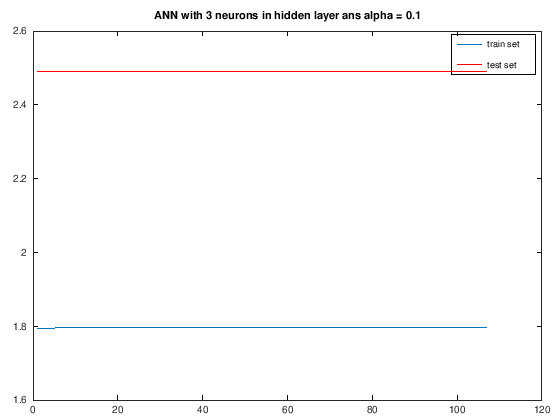

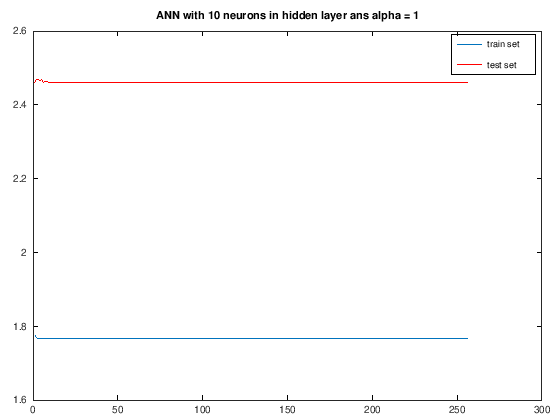

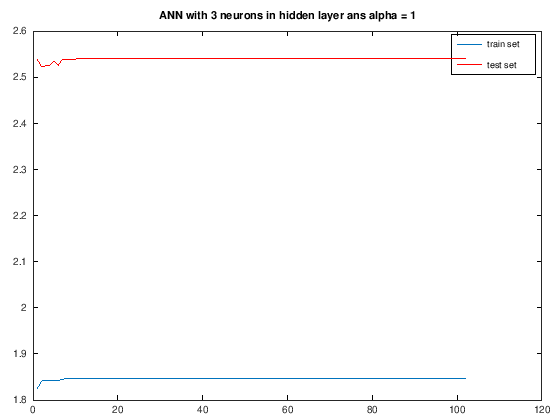

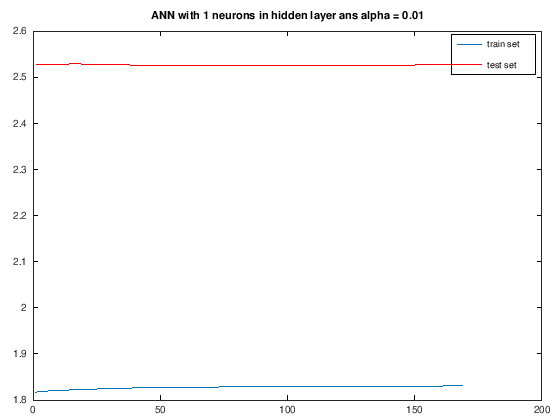

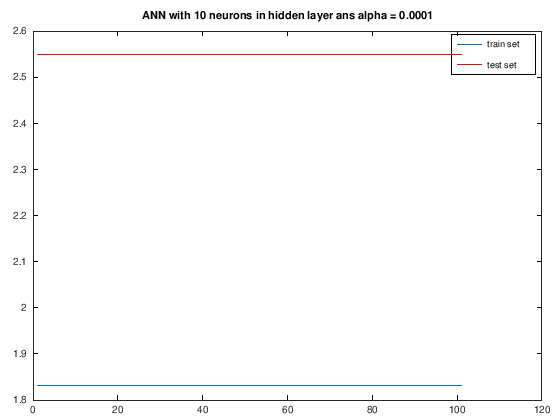

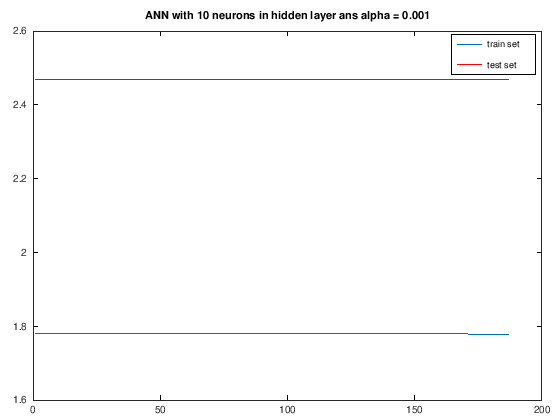

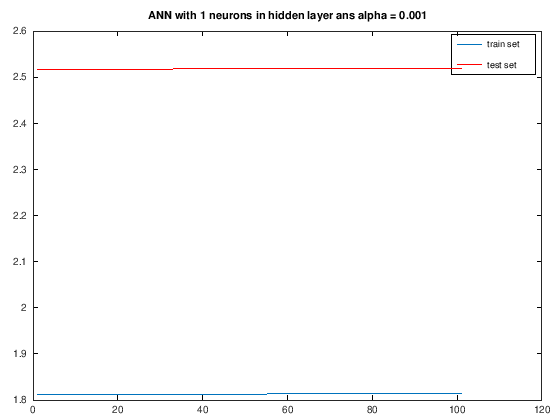

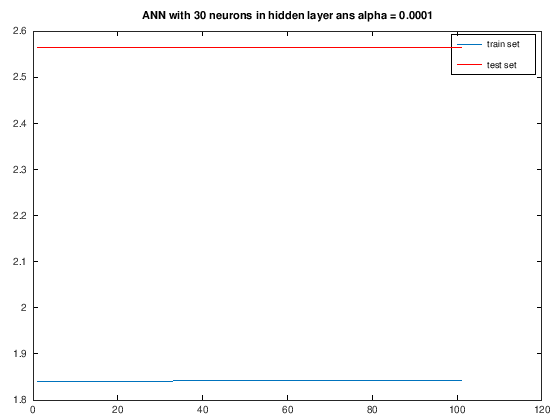

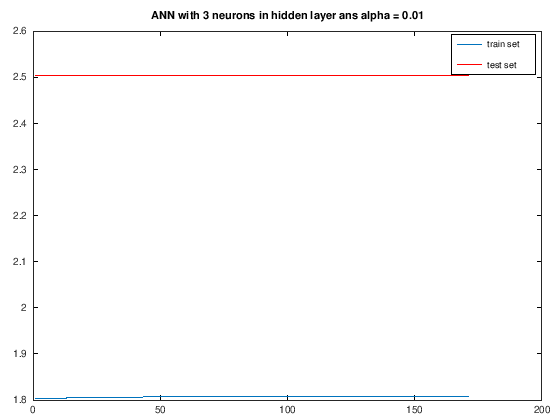

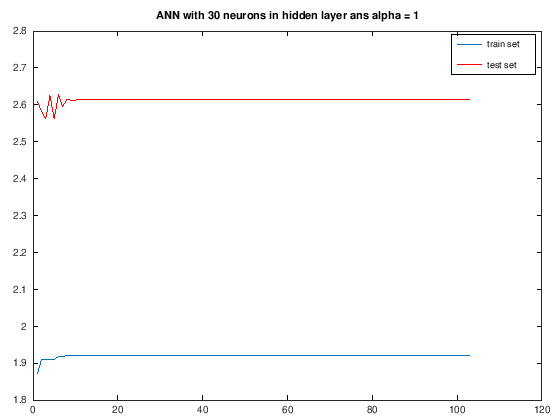

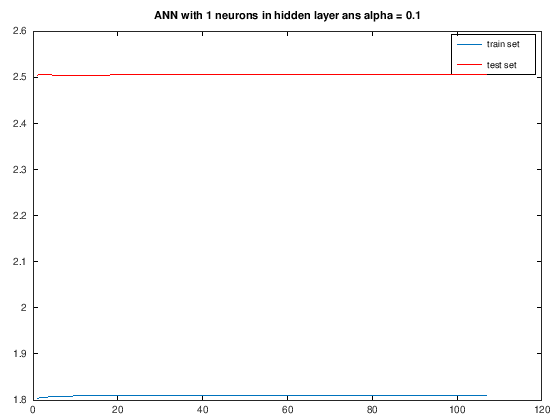

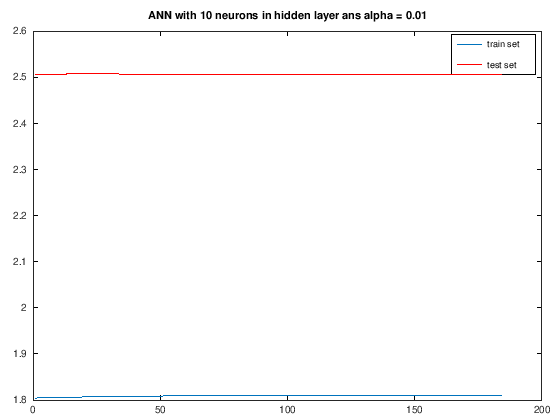

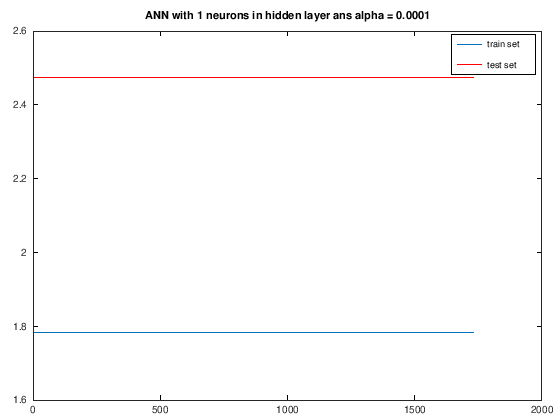

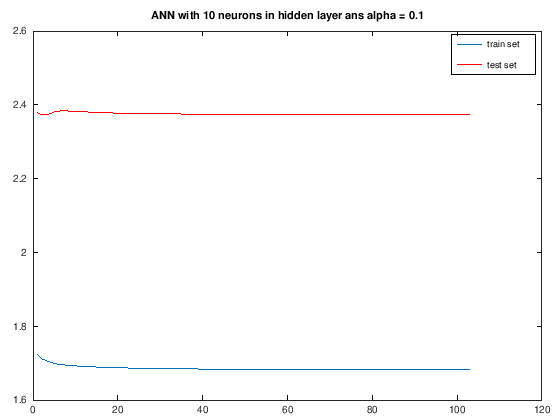

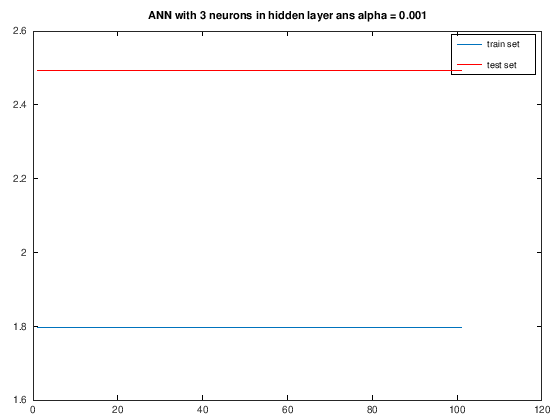

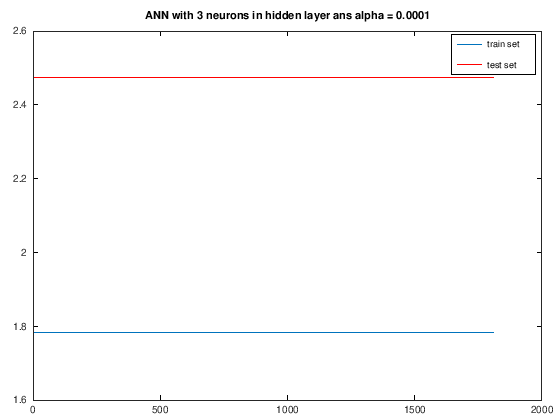

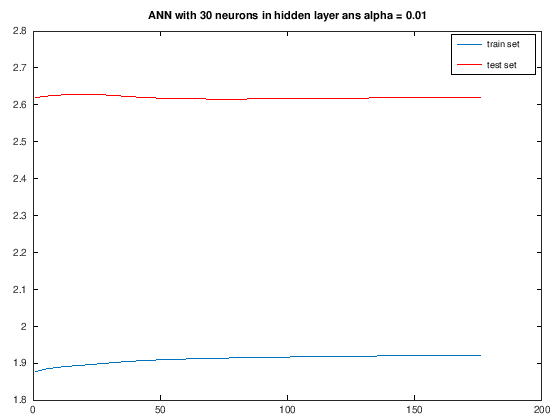

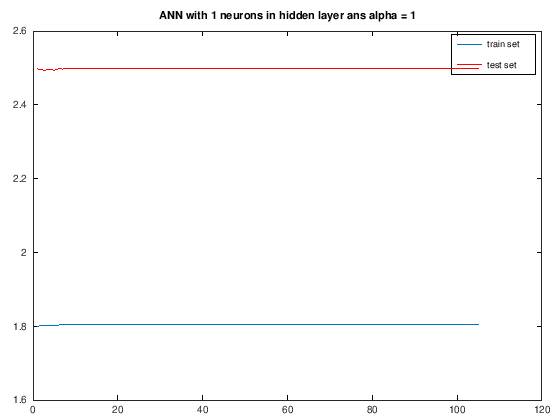

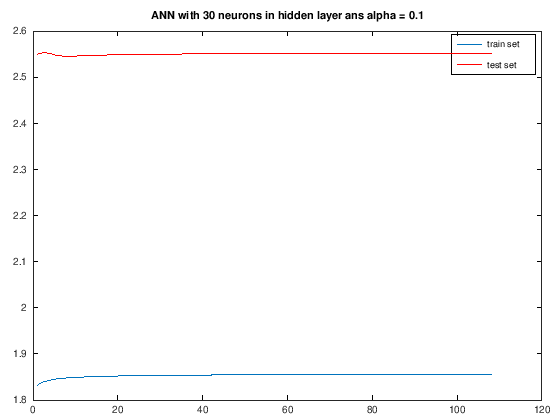

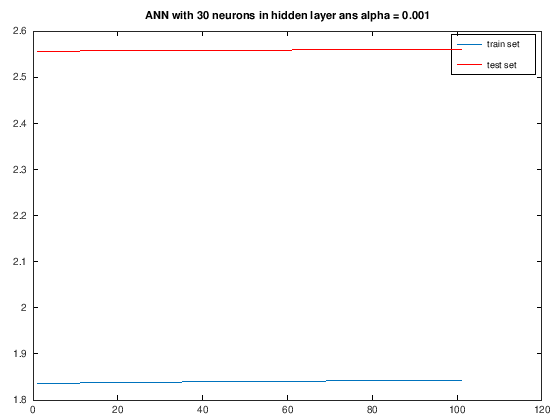

In [90]:
i = 1;
W_out = [];

% comparison of number of neurons in hidden layer
for O = [1, 3, 10, 30],
    for alpha = [1 0.1, 0.01, 0.001, 0.0001],
    
        neurons_hidden_layer = O
        alpha

        W = randn([O N]).*0.01;
        W_to_store = zeros(size(W));
        W_bias = [ones(size(W,1),1), W];
        
        W_o = randn([1 O]).*0.01;
        W_o_to_store = zeros(size(W_o));
        W_o_bias = [ones(size(W_o,1),1), W_o];

        [W_to_store, mse_train_vec, mse_test_vec] = ...
        batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias,
        W_o_bias, alpha, epsilon, gamma, 0, max_iter);
        W_out = [W_out; W_to_store];

        % learning curve
        figure(i)
        plot(mse_train_vec)
        hold on
        plot(mse_test_vec, 'r')
        title(['ANN with ' num2str(O) ' neurons in hidden layer ans alpha = ' num2str(alpha)])
        legend('train set', 'test set')

        i = i+1;
    end
end

alpha =  10
iter_min =  3
mse_min =  2.4213
alpha =  1
iter_min =  92
mse_min =  2.3299
alpha =  0.10000
iter_min =  3
mse_min =  2.4643
alpha =  0.010000
iter_min =  75
mse_min =  2.5190


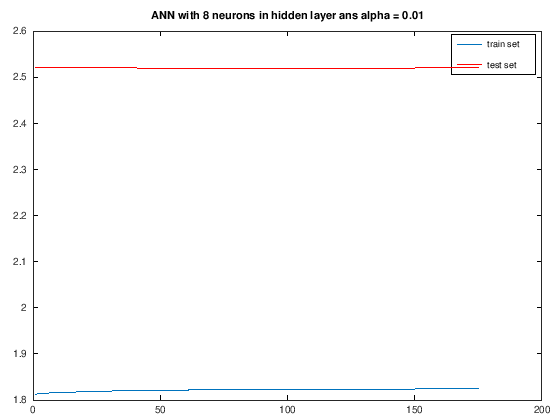

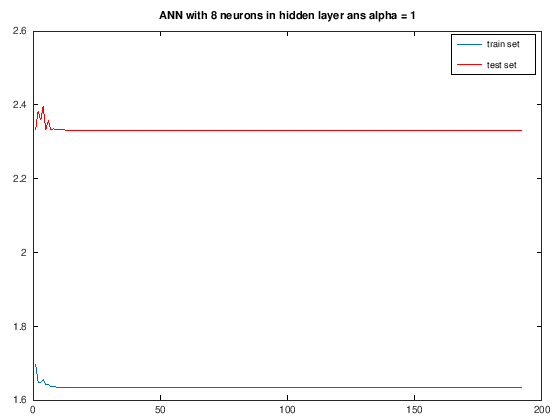

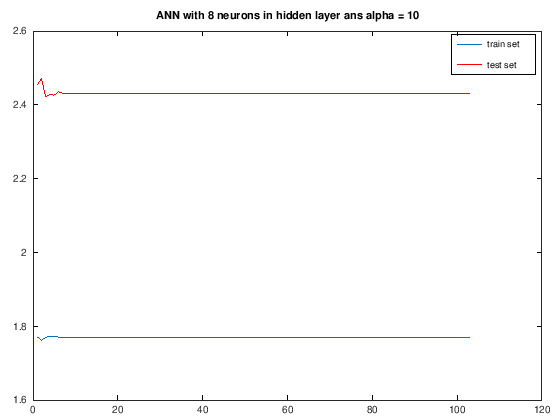

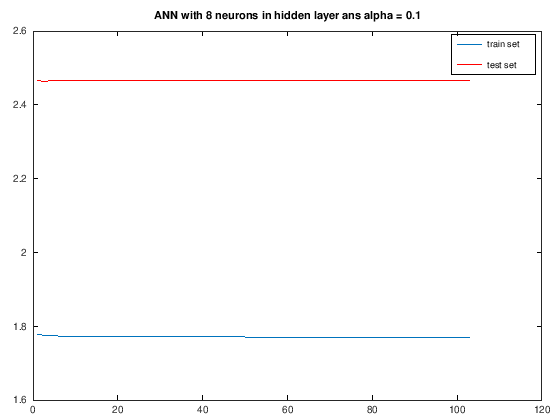

In [94]:
i = 1;
epsilon = 0.01;
max_iter = 30000;
gamma = 100;

for alpha = [10 1, 0.1, 0.01],
    
        O = 8;
        alpha

        W = randn([O N]).*0.01;
        W_to_store = zeros(size(W));
        W_bias = [ones(size(W,1),1), W];
        
        W_o = randn([1 O]).*0.01;
        W_o_to_store = zeros(size(W_o));
        W_o_bias = [ones(size(W_o,1),1), W_o];

        [W_to_store, mse_train_vec, ...
        mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias,
        W_o_bias, alpha, epsilon, gamma, 0, max_iter);
        W_out = [W_out; W_to_store];

        % learning curve
        figure(i)
        plot(mse_train_vec)
        hold on
        plot(mse_test_vec, 'r')
        title(['ANN with ' num2str(O) ' neurons in hidden layer ans alpha = ' num2str(alpha)])
        legend('train set', 'test set')

        i = i+1;
end